<a href="https://colab.research.google.com/github/luccemhu/3-TAREA-1INT46-PUCP/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case: The Bilateral Investment Treaties among countries

Integrantes:
- Joel B. Huamani Ccallocunto - 20196510
- Luis E. Valverde Ramos - 20191930

Let me use some information about trade among countries from the International Centre for Settlement of Investment Disputes-[ICSID](https://icsid.worldbank.org/) of the World Bank Group:

In particular, we scraped the [treaties by year of signature from 1996 to 2004:](https://icsid.worldbank.org/es/recursos/base-de-datos/base-de-datos-de-Tratados-Bilaterales-de-Inversi%C3%B3n)

The Bilateral Investment Treaties database allows for searches by signatory states, specific treaties, and years of signature. It also provides information on when treaties came into force and their relation to arbitration and conciliation under the ICSID Convention or the Additional Facility. Although ICSID strives to ensure the integrity of the information, the data is not exhaustive and is based on information provided by governments or found on governmental websites. For access to the full text of most of these treaties, one can consult the ICSID’s multivolume collection known as the Investment Treaty Series. Additionally, other investment treaties established on a multilateral basis or as chapters of free trade agreements are listed separately.

I have previously pre processed the data. Let me open the file with _read_excel_

# 3.1 Preparar una red (dirigida o no dirigida)  de su elección. (10 pts)



In [1]:
import pandas as pd
tradeDF=pd.read_excel("https://github.com/luccemhu/3-TAREA-1INT46-PUCP/raw/refs/heads/main/tratados-1996-2014.xlsx")
tradeDF.info()
tradeDF.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Parties                1678 non-null   object        
 1   Signature Date         1678 non-null   datetime64[ns]
 2   Entry into Force Date  1176 non-null   datetime64[ns]
 3   Reference to ICSID     1677 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 52.6+ KB


,Parties,Signature Date,Entry into Force Date,Reference to ICSID
0,Kenya / United Arab Emirates,2014-11-23,2017-06-05,Yes
1,Canada / Serbia,2014-09-01,2015-04-27,Yes
2,Colombia / Türkiye,2014-07-28,NaT,Yes
3,Colombia / France,2014-07-10,NaT,Yes
4,Georgia / Switzerland,2014-06-03,2015-04-17,Yes
5,Iraq / Jordan,2013-12-25,NaT,No
6,Japan / Myanmar,2013-12-15,NaT,Yes
7,Iraq / Kuwait,2013-12-06,2015-02-04,Yes
8,Netherlands / United Arab Emirates,2013-11-26,NaT,yes
9,Colombia / Singapore,2013-07-17,NaT,Yes


In [2]:
# Renombrar las columnas
tradeDF.rename(columns={
    'Parties': 'parties',
    'Signature Date': 'sig_date',
    'Entry into Force Date': 'entry_date',
    'Reference to ICSID': 'ICSID'
}, inplace=True)

In [3]:
# Convertir los valores de 'ICSID Ref' a 'Yes' o 'No', dejando solo 'Yes'
tradeDF['ICSID'] = tradeDF['ICSID'].str.strip().str.lower()  # Normalizar los valores
tradeDF['ICSID'] = tradeDF['ICSID'].replace(['yes'], 'Yes')  # Convertir 'yes' a 'Yes'
tradeDF['ICSID'] = tradeDF['ICSID'].replace(['no'], 'No')  # Convertir 'No' a 'No' (opcional)

In [4]:
# Reemplazar '/' por '-' en la columna 'Parties'
tradeDF['parties'] = tradeDF['parties'].str.replace('/', '-', regex=False)

In [5]:
#tradeDF.info()
#tradeDF.head(10)

The _Common Name_ is the name of the agreement. All countris involved are in a list (_Memembership_list_):

In [6]:
tradeDF.head()

,parties,sig_date,entry_date,ICSID
0,Kenya - United Arab Emirates,2014-11-23,2017-06-05,Yes
1,Canada - Serbia,2014-09-01,2015-04-27,Yes
2,Colombia - Türkiye,2014-07-28,NaT,Yes
3,Colombia - France,2014-07-10,NaT,Yes
4,Georgia - Switzerland,2014-06-03,2015-04-17,Yes


# 3.2 Aplicar todos los cálculos que correspondan según lo visto en clase. (4 pts)



Let me check the type of agreements we have in the data.

In [7]:
tradeDF.ICSID.value_counts()

,count
ICSID,
Yes,1170
No,507


Let me choose the 'agreement':

In [8]:
tradeDF.loc[tradeDF.ICSID=='Yes',:]

,parties,sig_date,entry_date,ICSID
0,Kenya - United Arab Emirates,2014-11-23,2017-06-05,Yes
1,Canada - Serbia,2014-09-01,2015-04-27,Yes
2,Colombia - Türkiye,2014-07-28,NaT,Yes
3,Colombia - France,2014-07-10,NaT,Yes
4,Georgia - Switzerland,2014-06-03,2015-04-17,Yes
...,...,...,...,...
1672,France - Morocco,1996-01-13,1999-05-30,Yes
1673,"Peru - Venezuela, Republica Bolivariana de",1996-01-12,1997-09-18,Yes
1675,Chile - United Kingdom of Great Britain and No...,1996-01-08,1997-04-21,Yes
1676,Azerbaijan - United Kingdom of Great Britain a...,1996-01-04,1996-12-11,Yes


I can make a network of countries. Let me create "edges" using **Membership_list**. First, let me show you how **combinations** work:

All the pairs above represent nodes and edges, then:

In [9]:
import pandas as pd
import networkx as nx
from itertools import combinations

In [10]:
parties_list = [party.strip() for party in tradeDF.loc[0, 'parties'].split('-')]

# Generar todas las combinaciones
combinations_list = list(combinations(sorted(parties_list), 2))

# Crear un grafo a partir de las combinaciones
Framework_Agreement_Net = nx.Graph(combinations_list)

# Ver el resultado
print("Combinaciones:", combinations_list)
print("Nodos del grafo:", Framework_Agreement_Net.nodes())
print("Aristas del grafo:", Framework_Agreement_Net.edges())

Combinaciones: [('Kenya', 'United Arab Emirates')]
Nodos del grafo: ['Kenya', 'United Arab Emirates']
Aristas del grafo: [('Kenya', 'United Arab Emirates')]


In [11]:
import pandas as pd
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
# Inicializar una lista para almacenar todas las combinaciones
all_combinations = []

# Iterar a través de todas las filas del DataFrame
for index, row in tradeDF.iterrows():
    # Extraer y dividir la cadena en una lista de países
    parties_list = [party.strip() for party in row['parties'].split('-')]
    # Generar todas las combinaciones de dos países
    combinations_list = list(combinations(sorted(parties_list), 2))

    # Agregar las combinaciones a la lista total
    all_combinations.extend(combinations_list)

In [13]:
# Crear un grafo a partir de todas las combinaciones
Framework_Agreement_Net = nx.Graph(all_combinations)
# Mostrar información sobre el grafo
#print("Combinaciones de países:", all_combinations)
#print("Nodos del grafo:", Framework_Agreement_Net.nodes())
#print("Aristas del grafo:", Framework_Agreement_Net.edges())

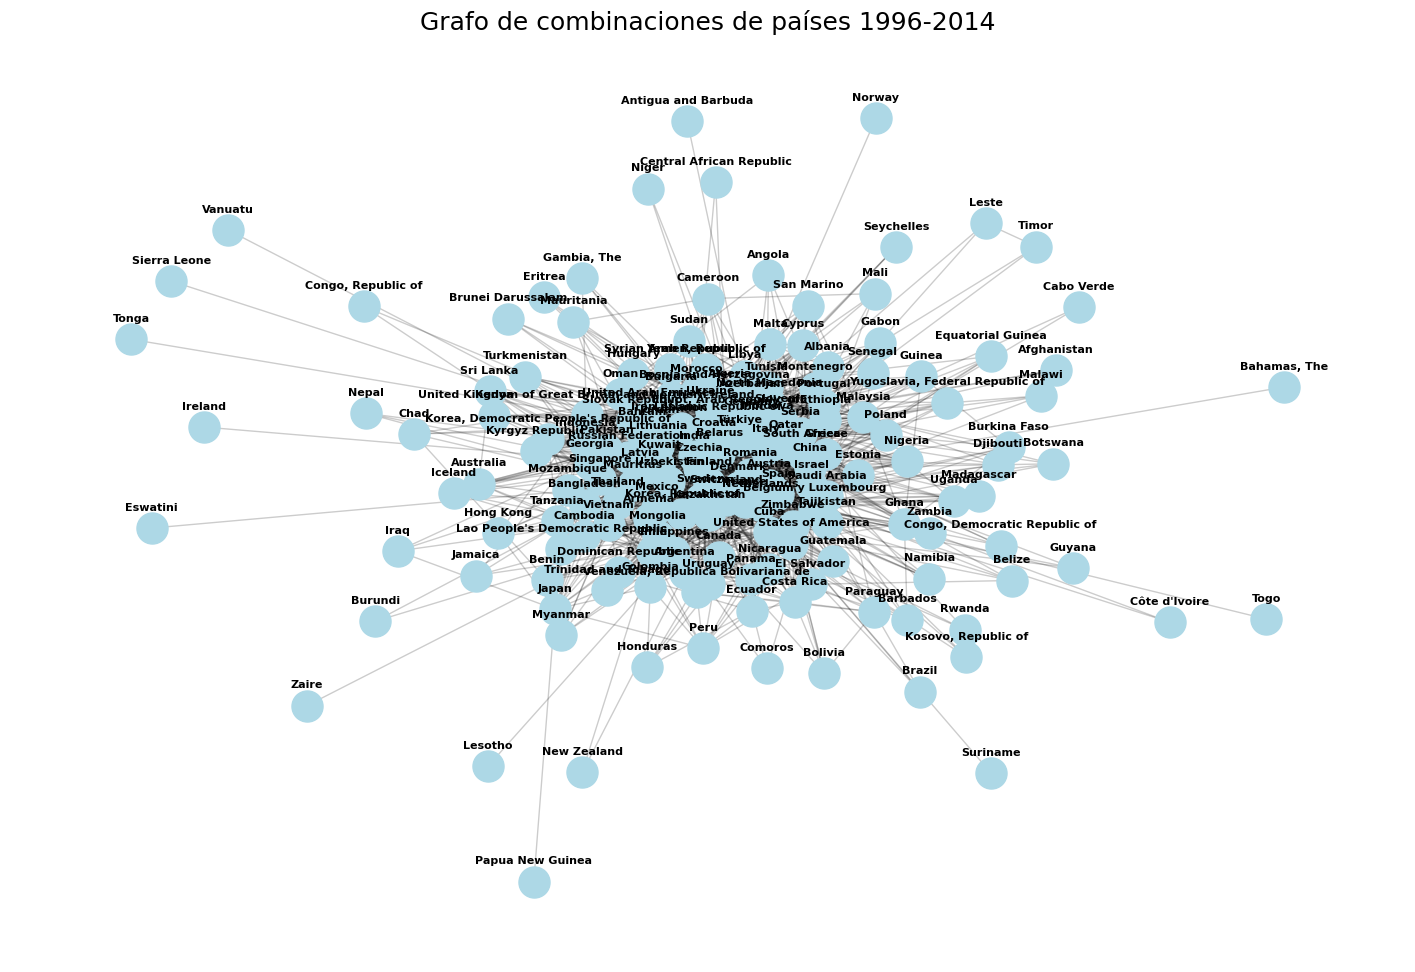

In [14]:
# Dibujar el grafo con mejor visualización
plt.figure(figsize=(18, 12))  # Aumentar el tamaño de la figura
pos = nx.spring_layout(Framework_Agreement_Net, k=0.2)  # Usar el layout de resorte con un valor k ajustado

# Dibujar los nodos y las aristas
nx.draw_networkx_edges(Framework_Agreement_Net, pos, alpha=0.2)
nx.draw_networkx_nodes(Framework_Agreement_Net, pos, node_color='lightblue', node_size=500
                       )

# Ajustar el tamaño de la fuente y el offset
label_pos = {k: (v[0], v[1] + 0.05) for k, v in pos.items()}  # Offset vertical para las etiquetas
nx.draw_networkx_labels(Framework_Agreement_Net, label_pos, font_size=8, font_weight='bold', font_color='black')

plt.title("Grafo de combinaciones de países 1996-2014", fontsize=18)
plt.axis('off')  # Desactivar los ejes
plt.show()

# Crisis del 2008

In [15]:
# Asegúrate de que la columna 'sig_date' esté en formato de fecha
tradeDF['sig_date'] = pd.to_datetime(tradeDF['sig_date'])

# Filtrar las observaciones desde el 2008 en adelante
filtered_tradeDF = tradeDF[tradeDF['sig_date'] >= '2008-01-01']

In [16]:
filtered_tradeDF.info()
filtered_tradeDF.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   parties     223 non-null    object        
 1   sig_date    223 non-null    datetime64[ns]
 2   entry_date  106 non-null    datetime64[ns]
 3   ICSID       223 non-null    object        
dtypes: datetime64[ns](2), object(2)
memory usage: 8.7+ KB


,parties,sig_date,entry_date,ICSID
0,Kenya - United Arab Emirates,2014-11-23,2017-06-05,Yes
1,Canada - Serbia,2014-09-01,2015-04-27,Yes
2,Colombia - Türkiye,2014-07-28,NaT,Yes
3,Colombia - France,2014-07-10,NaT,Yes
4,Georgia - Switzerland,2014-06-03,2015-04-17,Yes
5,Iraq - Jordan,2013-12-25,NaT,No
6,Japan - Myanmar,2013-12-15,NaT,Yes
7,Iraq - Kuwait,2013-12-06,2015-02-04,Yes
8,Netherlands - United Arab Emirates,2013-11-26,NaT,Yes
9,Colombia - Singapore,2013-07-17,NaT,Yes


In [17]:
filtered_tradeDF.ICSID.value_counts()

,count
ICSID,
Yes,147
No,76


In [18]:
# Inicializar una lista para almacenar todas las combinaciones
all_combinations2 = []

# Iterar a través de todas las filas del DataFrame
for index, row in filtered_tradeDF.iterrows():
    # Extraer y dividir la cadena en una lista de países
    parties_list = [party.strip() for party in row['parties'].split('-')]
    # Generar todas las combinaciones de dos países
    combinations_list = list(combinations(sorted(parties_list), 2))

    # Agregar las combinaciones a la lista total
    all_combinations2.extend(combinations_list)

In [19]:
# Crear un grafo a partir de todas las combinaciones
Framework_Agreement_Net2 = nx.Graph(all_combinations2)
# Mostrar información sobre el grafo
#print("Combinaciones de países:", all_combinations2)
#print("Nodos del grafo:", Framework_Agreement_Net2.nodes())
#print("Aristas del grafo:", Framework_Agreement_Net2.edges())

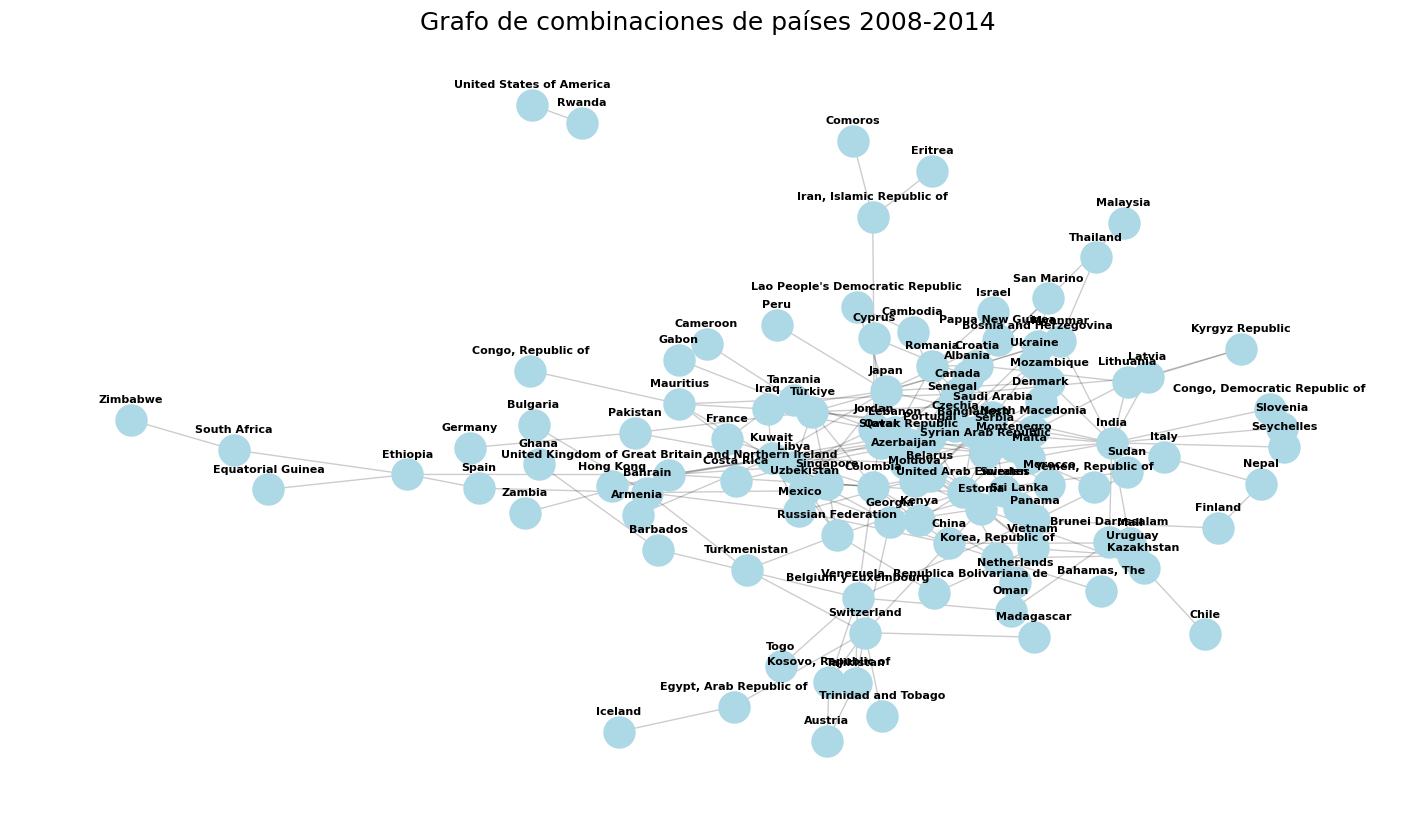

In [20]:
# Dibujar el grafo con mejor visualización
plt.figure(figsize=(18, 10))  # Aumentar el tamaño de la figura
pos = nx.spring_layout(Framework_Agreement_Net2, k=0.2)  # Usar el layout de resorte con un valor k ajustado

# Dibujar los nodos y las aristas
nx.draw_networkx_edges(Framework_Agreement_Net2, pos, alpha=0.2)
nx.draw_networkx_nodes(Framework_Agreement_Net2, pos, node_color='lightblue', node_size=500
                       )

# Ajustar el tamaño de la fuente y el offset
label_pos = {k: (v[0], v[1] + 0.05) for k, v in pos.items()}  # Offset vertical para las etiquetas
nx.draw_networkx_labels(Framework_Agreement_Net2, label_pos, font_size=8, font_weight='bold', font_color='black')

plt.title("Grafo de combinaciones de países 2008-2014", fontsize=18)
plt.axis('off')  # Desactivar los ejes
plt.show()

In [21]:
pd.Series(all_combinations2).value_counts().reset_index()

,index,count
0,"(Kenya, United Arab Emirates)",1
1,"(China, Malta)",1
2,"(Mauritius, Tanzania)",1
3,"(Czechia, Türkiye)",1
4,"(Portugal, Qatar)",1
...,...,...
217,"(Armenia, Kuwait)",1
218,"(Egypt, Arab Republic of, Switzerland)",1
219,"(Azerbaijan, Belarus)",1
220,"(India, Seychelles)",1


In [22]:
# Definir nombres nuevos para las columnas
newNames = {'index': 'countryTuple', 'count': 'weight'}

# Contar las combinaciones de tuplas y crear un DataFrame
tuplesAndWeights = pd.DataFrame(pd.Series(all_combinations2).value_counts()).reset_index(drop=False).rename(columns=newNames)

# Ver el resultado
print(tuplesAndWeights)


                               countryTuple  weight
0             (Kenya, United Arab Emirates)       1
1                            (China, Malta)       1
2                     (Mauritius, Tanzania)       1
3                        (Czechia, Türkiye)       1
4                         (Portugal, Qatar)       1
..                                      ...     ...
217                       (Armenia, Kuwait)       1
218  (Egypt, Arab Republic of, Switzerland)       1
219                   (Azerbaijan, Belarus)       1
220                     (India, Seychelles)       1
221      (Egypt, Arab Republic of, Iceland)       1

[222 rows x 2 columns]


In [23]:
tuplesAndWeights[['country1','country2']]=tuplesAndWeights['countryTuple'].to_list()
tuplesAndWeights

,countryTuple,weight,country1,country2
0,"(Kenya, United Arab Emirates)",1,Kenya,United Arab Emirates
1,"(China, Malta)",1,China,Malta
2,"(Mauritius, Tanzania)",1,Mauritius,Tanzania
3,"(Czechia, Türkiye)",1,Czechia,Türkiye
4,"(Portugal, Qatar)",1,Portugal,Qatar
...,...,...,...,...
217,"(Armenia, Kuwait)",1,Armenia,Kuwait
218,"(Egypt, Arab Republic of, Switzerland)",1,"Egypt, Arab Republic of",Switzerland
219,"(Azerbaijan, Belarus)",1,Azerbaijan,Belarus
220,"(India, Seychelles)",1,India,Seychelles


In [24]:
RFTA_net=nx.from_pandas_edgelist(tuplesAndWeights, source='country1',target='country2',edge_attr=["weight"])

In [25]:
#RFTA_net.edges.data()

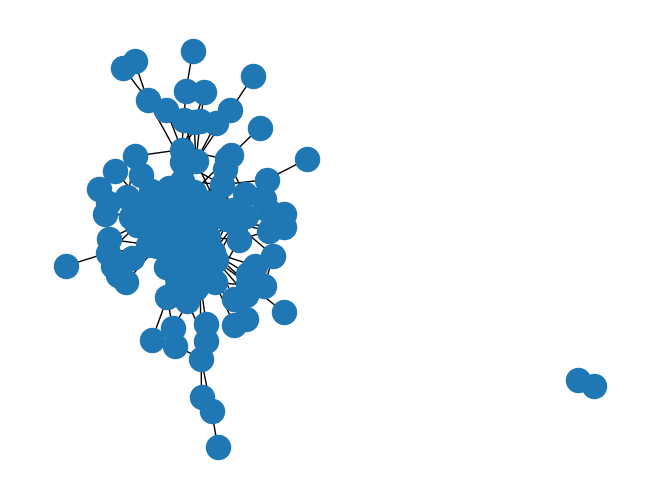

In [26]:
nx.draw(RFTA_net)

In [27]:
len(RFTA_net.nodes()),len(RFTA_net.edges())

(115, 222)

We are not supposed to have isolates:

In [28]:
list(nx.isolates(RFTA_net))

[]

There should not be self loops:

In [29]:
nx.number_of_selfloops(RFTA_net)
# RFTA_net.remove_edges_from(nx.selfloop_edges(RFTA_net))

0

# 3.1 Crear un párrafo final donde resalta lo más relevante que ha encontrado. (2 pts)



1. Between 1996 and 2014, a total of 1,677 bilateral investment agreements were recorded among states, reflecting an increasing trend in international investment cooperation. These agreements are crucial for enhancing economic ties, as they provide a legal framework that protects foreign investments and fosters economic stability. However, many African countries, such as Sierra Leone, Togo, Vanuatu, and Eswatini, are either excluded or positioned far from the center of the network, indicating a potential underrepresentation in global investment flows. In contrast, European countries, such as Italy, Spain, and the United States, occupy central positions in the network, highlighting their dominant role in international investment dynamics.

2. The financial crisis of 2008 in the United States had a significant international impact, primarily affecting the U.S. and its trade partners. This economic downturn led to a reevaluation of investment strategies and priorities, influencing the number and nature of bilateral investment agreements. Between 2008 and 2014, there were 223 bilateral investment agreements, a marked decrease compared to previous years. This trend is reflected in the graph, which highlights that the U.S. signed only one bilateral investment agreement with Rwanda during this period, placing it far from the center of the network. This singular agreement underscores a shift in U.S. foreign investment policy and a possible retreat from aggressive bilateral investment treaty negotiations in the wake of the financial crisis.

- It is important to note that countries like Saudi Arabia have begun to integrate African nations into their investment portfolios, indicating a strategic shift toward emerging markets. This integration has the potential to enhance economic development in these regions; however, the impact on European countries has been mixed, as they have not signed a large number of agreements during this period. This lack of engagement may reflect a focus on consolidating existing investments rather than pursuing new opportunities.

- On the other hand, China has significantly increased its activity by signing agreements with various African nations, emphasizing a growing collaborative process among these actors. This strategy aligns with China's broader Belt and Road Initiative, which seeks to enhance connectivity and trade between China and Africa. As a result, Chinese investments in Africa have surged, fostering economic growth in the region while also establishing China as a key player in international investment. This evolving landscape illustrates the shifting dynamics of global investment flows, where emerging economies are increasingly becoming pivotal in shaping bilateral investment agreements.

# 3.4 Use github para almacenar, publicar y presentar su trabajo (4 pts)

Enlace al repositorio de la tarea 3:https://github.com/luccemhu/3-TAREA-1INT46-PUCP

Enlace a GitHub Pages: https://luccemhu.github.io/3-TAREA-1INT46-PUCP/